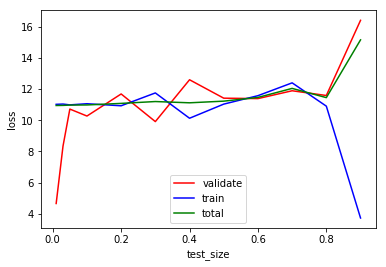

In [42]:
#导入所需库
from io import BytesIO
import requests
import numpy as np
from numpy import random,mat
import numpy.linalg as lg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

#读取数据
r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale")
X, y=datasets.load_svmlight_file(BytesIO(r.content),n_features=13)

#将X转化为ndarray，加入一列1
X=X.toarray()
x1=np.ones(X.shape[0])
X=np.insert(X,X.shape[1],values=x1,axis=1)
loss_train=[]
loss_validate=[]
loss=[]
#以不同的训练集比例切分数据
for i in [0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    X_train,X_validate,y_train,y_validate=train_test_split(X,y,test_size=i,random_state=1)
    y_train=y_train.reshape(X_train.shape[0],1)
    y=y.reshape(X.shape[0],1)
    y_validate=y_validate.reshape(X_validate.shape[0],1)

    #初始化模型参数
    rgen = np.random.RandomState(1)
    w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

    #损失函数
    def loss_mse(pred,true): 
        loss=0
        for i in true-pred:
            loss+=i.tolist()[0][0]*i.tolist()[0][0]/2
        return loss/true.shape[0]
    
    #闭式解
    def close_solution(X,y):
        X=mat(X)
        y=mat(y)
        X1=lg.inv(X.T*X)
        X2=X.T
        X3=X1*X2
        return X3*y

    #权重参数w
    w=close_solution(X_train,y_train)
    loss_train.append(loss_mse(X_train*w,y_train))
    loss_validate.append(loss_mse(X_validate*w,y_validate))    
    loss.append(loss_mse(X*w,y))
#    print(loss_mse(X_train*w,y_train))
#    print(loss_mse(X_validate*w,y_validate))
#    print(i)
#    print(loss)

test_size = [0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#图一
plt.plot(test_size, loss_validate,color='r',label="validate")
plt.plot(test_size,loss_train,color='b',label="train")
plt.plot(test_size,loss,color='g',label="total")
plt.xlabel('test_size')
plt.ylabel('loss')
plt.legend(loc='lower center')
plt.show()

